##Level 1

**As a data scientist of a leading decision analysis firm you are required to predict the potential global user of the game based on the data provided by the customer so that they can plan their global launch.** 

* Name - Game name 

* Platform - Running platform  

* Year of release 

* Genre - Game Genre 

* Publisher  

* Critic_ score - Aggregate score compiled by Metacritic staff 

* Critic_count - The number of critics used in coming up with the Critic Score 

* User_score - Score by Metacritic’s subscribers 

* Usercount - Number of users who gave the user score 

* Developer - Party responsible for creating the game 

* Rating - The ESRB ratings 

* NA_Sales - Sales in North America (in millions of units) 

* EU_Sales - Sales in the European Union (in millions of units) 

* JP_Sales - Sales in Japan (in millions of units) 

* Global_Sales - Total sales in the world (in millions of units)



## Using tensorflow version==2.0.0

In [1]:
#pip install tensorflow==2.8.0

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


## Connecting to Google Drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.chdir("/content/drive/MyDrive/DeepL/Hackathon/Dataset")

In [5]:
!dir

sample.csv  Submission1.csv  Test.csv  Train.csv  Weights-076--0.02571.hdf5


##Importing Libraries.

In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import math
import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from tensorflow.keras.models import load_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

from xgboost import XGBRegressor

%matplotlib inline

In [7]:
#Suppress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

In [8]:
#Importing the dataset
data = pd.read_csv("Train.csv")

In [9]:
#Checking the DataFrameShape.
data.shape

(14576, 15)

**Total 15 columns and 14576 rows. which is actually good enough.**

In [10]:
#Checking the Files is proper or not.
data.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


**See, here is your video games data.**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     7217 non-null   float64
 9   Critic_Count     7217 non-null   float64
 10  User_Score       8760 non-null   object 
 11  User_Count       6796 non-null   float64
 12  Developer        8829 non-null   object 
 13  Rating           8704 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


**Their fields and data types are:**

* Name - Game name 

* Platform - Running platform  

* Year of release 

* Genre - Game Genre 

* Publisher  

* Critic_ score - Aggregate score compiled by Metacritic staff 

* Critic_count - The number of critics used in coming up with the Critic Score 

* User_score - Score by Metacritic’s subscribers 

* Usercount - Number of users who gave the user score 

* Developer - Party responsible for creating the game 

* Rating - The ESRB ratings 

* NA_Sales - Sales in North America (in millions of units) 

* EU_Sales - Sales in the European Union (in millions of units) 

* JP_Sales - Sales in Japan (in millions of units) 

* Global_Sales - Total sales in the world (in millions of units)



In [12]:
#Data Describing
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales
count,14344.000000,14576.000000,14576.000000,14576.000000,7217.000000,7217.000000,6796.000000,14576.000000
mean,2006.437117,0.295577,0.163957,0.085659,69.676043,27.312041,172.513096,0.598972
std,5.955664,0.866491,0.536354,0.329646,13.773391,19.464196,576.609716,1.647699
min,1980.000000,0.000000,0.000000,0.000000,13.000000,3.000000,4.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,61.000000,12.000000,11.000000,0.050000
50%,2007.000000,0.100000,0.030000,0.000000,71.000000,22.000000,27.000000,0.220000
75%,2010.000000,0.280000,0.130000,0.030000,80.000000,38.000000,89.000000,0.550000
max,2020.000000,41.360000,28.960000,10.220000,98.000000,113.000000,10665.000000,82.530000


In [13]:
data.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,14574,14576,14574,14527,8760,8829,8704
unique,10327,31,12,552,96,1577,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,11,1935,2974,1267,1964,171,3460


## Checking the Missing values.

In [14]:
#Missing values
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

In [15]:
#Missing Values

total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
User_Count,7780,53.375412
Critic_Score,7359,50.487102
Critic_Count,7359,50.487102
Rating,5872,40.285401
User_Score,5816,39.901207


###Visualising the Missing Values in Each Column For Better Understanding:

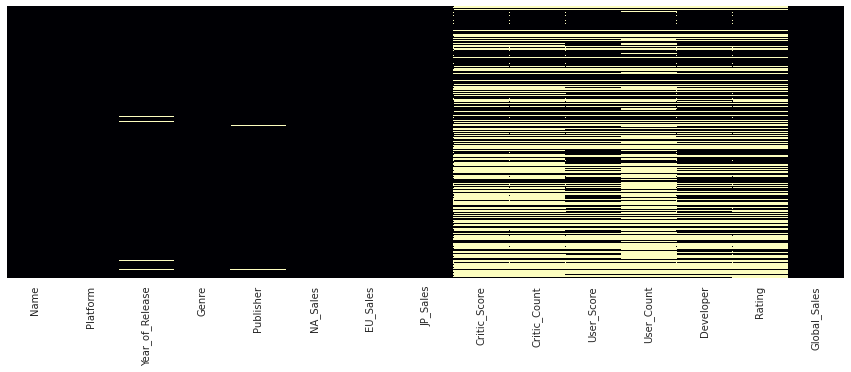

In [16]:
##Visualising the Missing Values in Each Column For Better Understanding:

plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap="magma" )

**It is evident from the above heatmap that our dataset contains a lot of missing values and we can not use feature that has so many missing values.**

**Above heatmap shows how many values are missing in every columns. All the light colored columns represents the amount of missing values present in that specific column.**

In [17]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating', 'Global_Sales'],
      dtype='object')

In [18]:
##Droping the value 

# Critic_Score variable because its a unique number
data=data.drop('Critic_Score',axis=1)


# Critic_Count variable because its a unique number
data=data.drop('Critic_Count',axis=1)


# User_Score variable because its a unique number
data=data.drop('User_Score',axis=1)


# User_Count variable because its a unique number
data=data.drop('User_Count',axis=1)


# Developer variable because its a unique number
data=data.drop('Developer',axis=1)


# Rating variable because its a unique number
data=data.drop('Rating',axis=1)

In [19]:
#re-Checking that Columns are drop or not 
data.shape

(14576, 9)

In [20]:
#Checking missing values
data.isnull().sum()

Name                 2
Platform             0
Year_of_Release    232
Genre                2
Publisher           49
NA_Sales             0
EU_Sales             0
JP_Sales             0
Global_Sales         0
dtype: int64

**We can cleary see that thier is too much of missing data in Year_of_Release so  will fill it with mean().**

In [21]:
#Using Mean to fill empty spaces
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].mean())

In [22]:
#Re-checking 
data.isnull().sum()

Name                2
Platform            0
Year_of_Release     0
Genre               2
Publisher          49
NA_Sales            0
EU_Sales            0
JP_Sales            0
Global_Sales        0
dtype: int64

**Happy news, we don't have much missing values.That means we are not losing much information.It's already good readymade dataset.**

# Exploratory Data Analysis (EDA) 

## 1.What genre games have been made the most?








In [23]:
#Value caount for Genre
data['Genre'].value_counts()

Action          2974
Sports          2078
Misc            1503
Role-Playing    1300
Shooter         1171
Adventure       1127
Racing          1084
Platform         786
Simulation       753
Fighting         728
Strategy         582
Puzzle           488
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

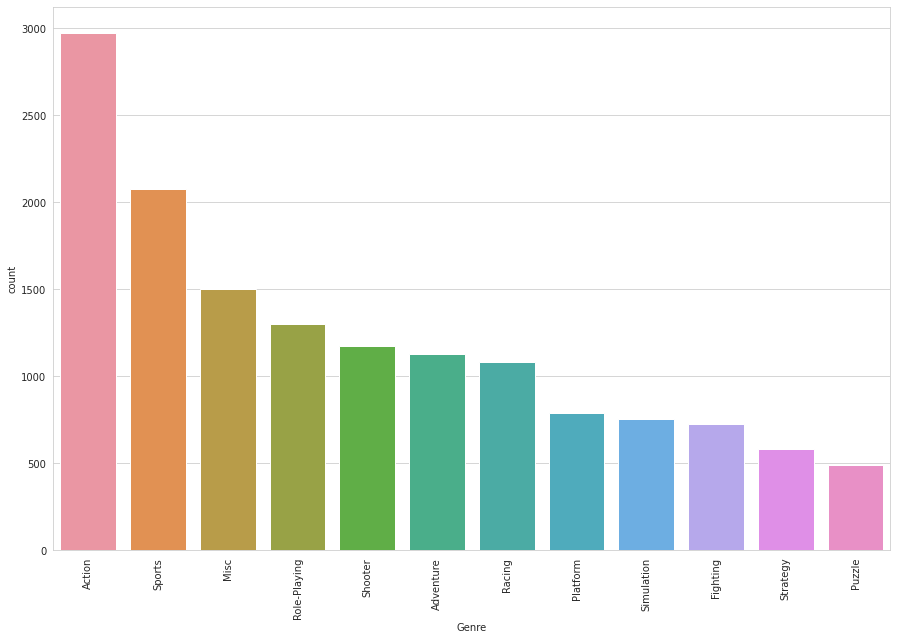

In [24]:
#Visualizing Genre Data in countplot 
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

**Answer is => "Action" and "Sports"**

I see, most of the people love action and sports game.
Which one your favorite???

## 2. Which year had the most game release?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

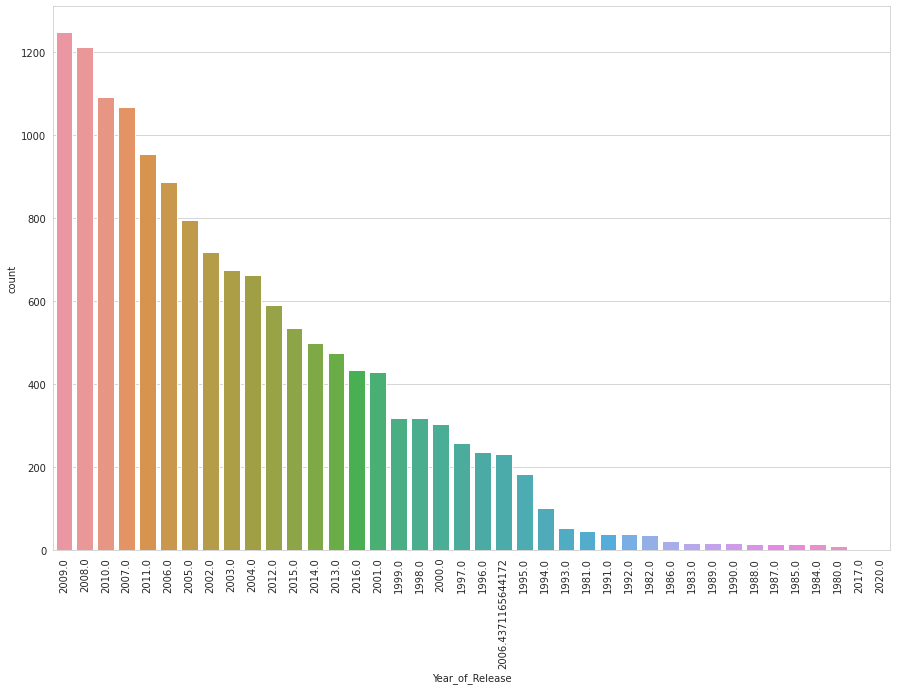

In [25]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year_of_Release", data=data, order = data.groupby(by=['Year_of_Release'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

**Answer is =>**

2009.0 -> 1231

2008.0 -> 1228

2010.0 -> 1159

2007.0 -> 1102

2011.0 -> 9139

It's seems like that 2008 to 2010 was game lovers years.

## 3. Top 5 years games release by genre.

In [26]:
#Value count for Publisher
data['Publisher'].value_counts()

Electronic Arts                 1267
Activision                       881
Ubisoft                          803
Namco Bandai Games               778
Konami Digital Entertainment     709
                                ... 
Quelle                             1
Wargaming.net                      1
mixi, Inc                          1
Playmates                          1
Red Flagship                       1
Name: Publisher, Length: 552, dtype: int64

**Here we can see the top 5 company who have publish the game are.** 

1. Electronic Arts Company-1267

2. Activision-881

3. Ubisoft-803

4. Namco Bandai Games-778

5. Konami Digital Entertainment-709

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

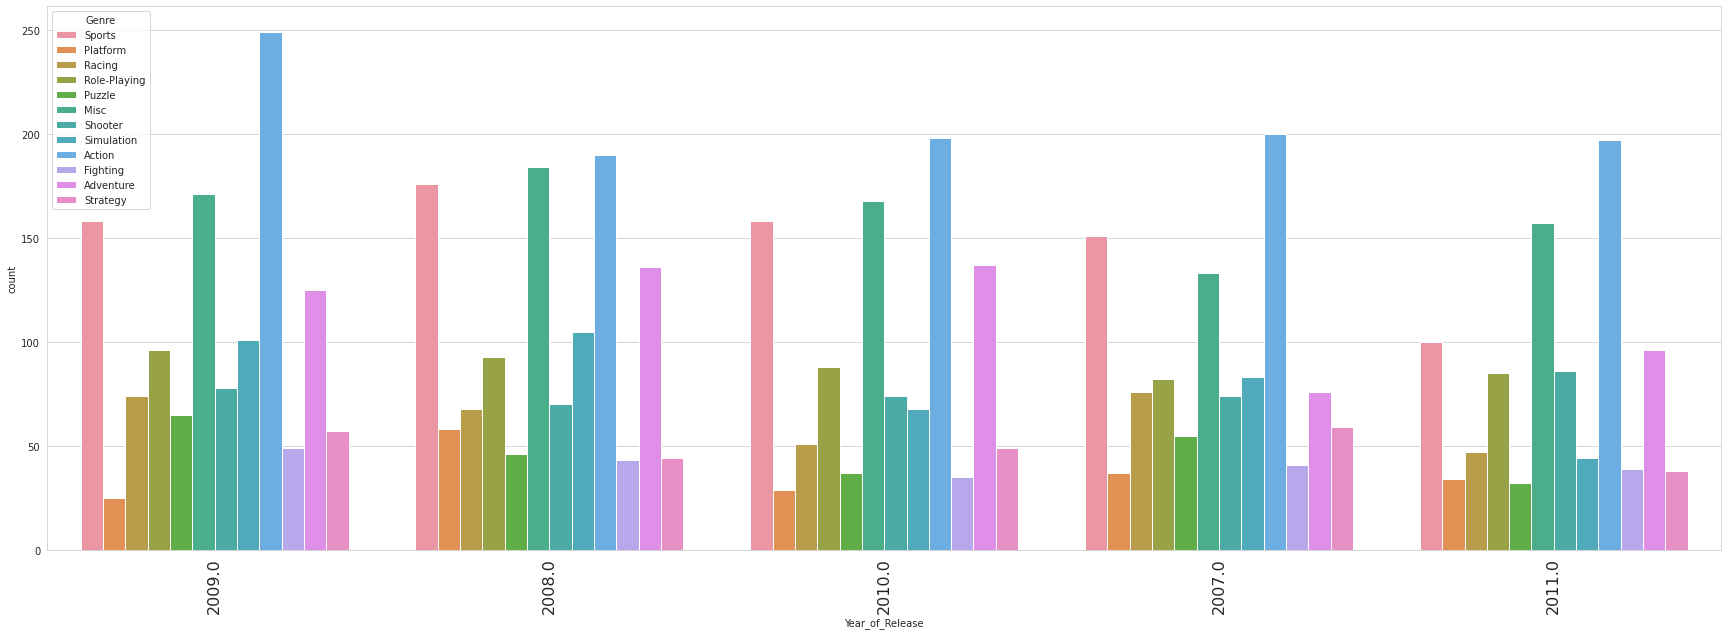

In [27]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year_of_Release", data=data, hue='Genre', order=data.Year_of_Release.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

**Action was always on top.**

##4. Which year had the highest sales worldwide?

In [28]:
data_year = data.groupby(by=['Year_of_Release'])['Global_Sales'].sum()
data_year = data_year.reset_index()
data_year.sort_values(by=['Global_Sales'], ascending=False)

,Year_of_Release,Global_Sales
29,2008.000000,652.61
30,2009.000000,643.36
28,2007.000000,594.17
31,2010.000000,575.69
26,2006.000000,507.52
32,2011.000000,491.11
25,2005.000000,445.76
24,2004.000000,410.64
22,2002.000000,385.54
34,2013.000000,355.05


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

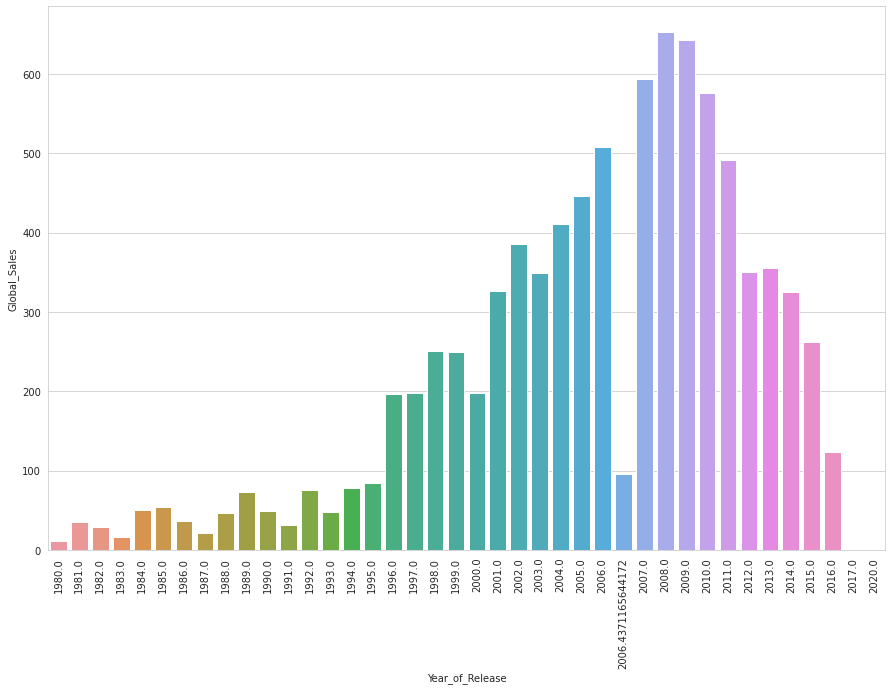

In [29]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year_of_Release", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

**Answer is =>**

2008.0=678.90

2009.0=667.30

2007.0=611.13

2010.0=600.45

2006.0=521.04

**Interesting 2006 was not in top 5 game release year but it is in top 5 highest sale year.**

##5. Which genre game has been released the most in a single year?

In [30]:
year_max_df = data.groupby(['Year_of_Release', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year_of_Release'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year_of_Release", "count"], keep='last').reset_index(drop=True)
year_max_genre

,Year_of_Release,Genre,count
0,1980.000000,Misc,4
1,1981.000000,Action,25
2,1982.000000,Action,18
3,1983.000000,Action,7
4,1984.000000,Shooter,3
5,1985.000000,Puzzle,4
6,1986.000000,Platform,6
7,1987.000000,Role-Playing,3
8,1988.000000,Platform,4
9,1989.000000,Puzzle,5


In [31]:
genre = year_max_genre['Genre'].values
genre[2]

'Action'

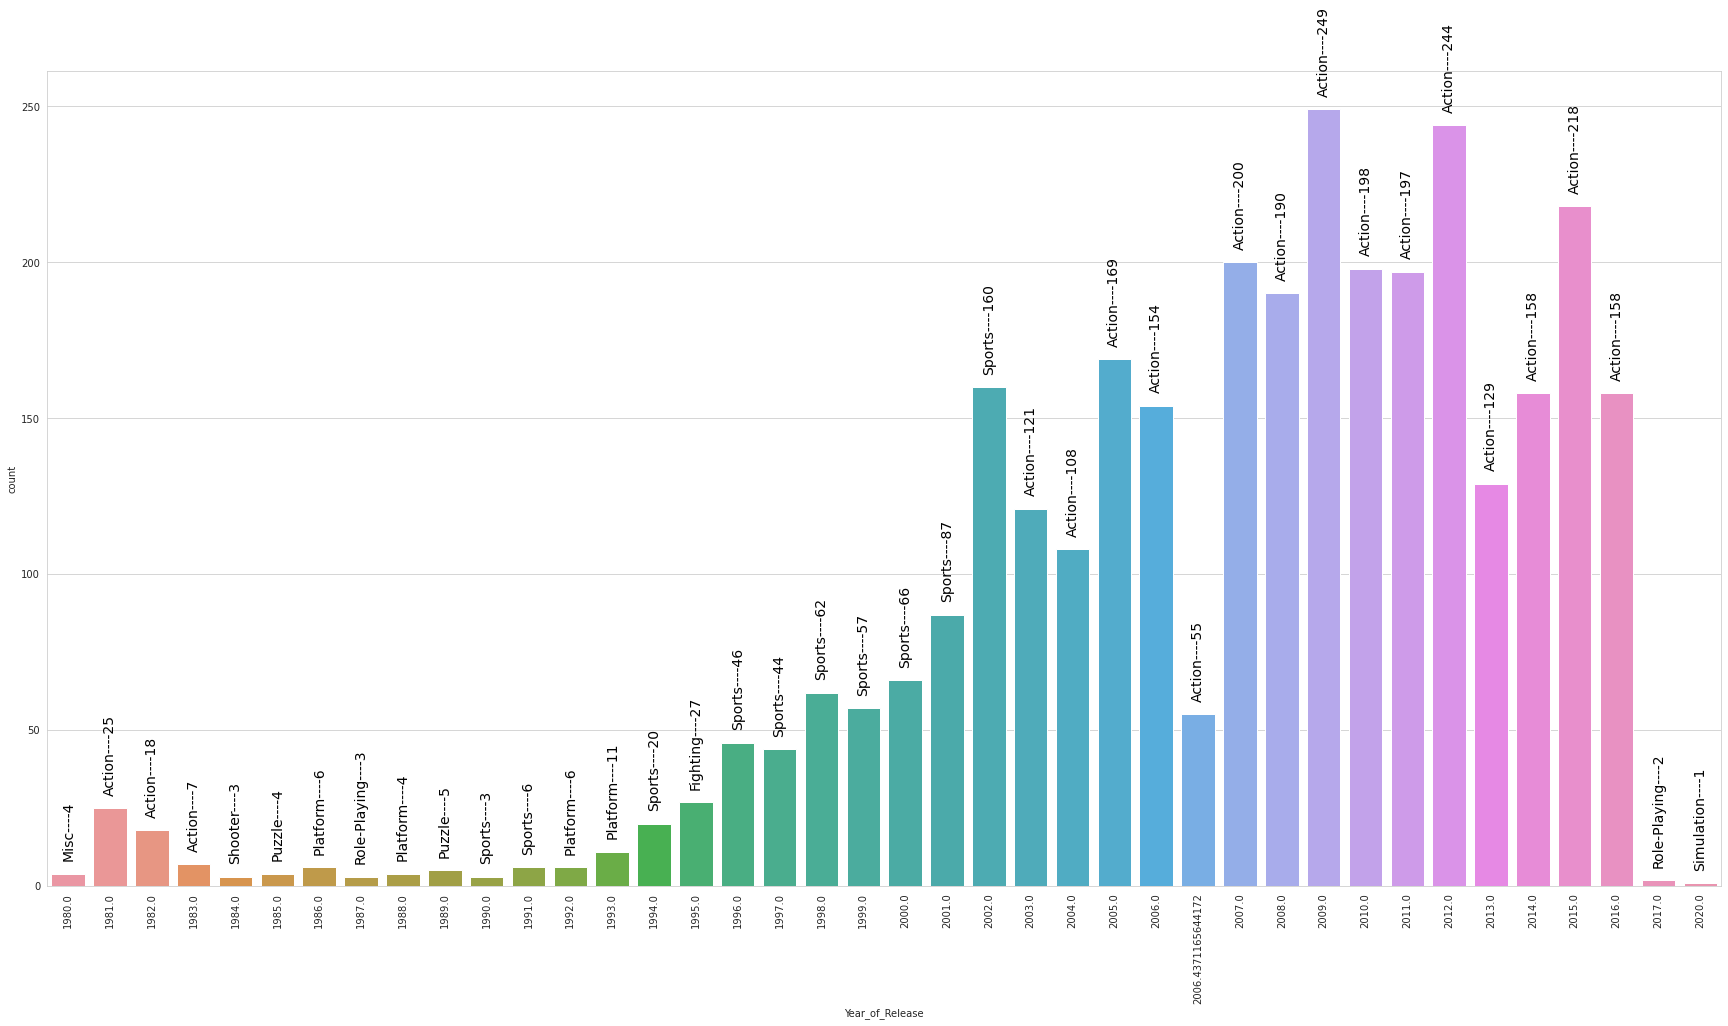

In [32]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year_of_Release', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

**Answer is =>**

2009 Action ---> 249 and 

2012 Action ---> 244 games are release.

##6. Which genre game has sold the most in a single year?

In [33]:
year_sale_dx = data.groupby(by=['Year_of_Release', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year_of_Release'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
year_sale_max

,Year_of_Release,Genre,Global_Sales
0,1980.000000,Shooter,7.07
1,1981.000000,Action,14.84
2,1982.000000,Puzzle,10.03
3,1983.000000,Platform,6.93
4,1984.000000,Shooter,31.10
5,1985.000000,Platform,43.17
6,1986.000000,Action,13.74
7,1987.000000,Fighting,5.42
8,1988.000000,Platform,27.73
9,1989.000000,Puzzle,37.75


In [34]:
genre = year_sale_max['Genre']

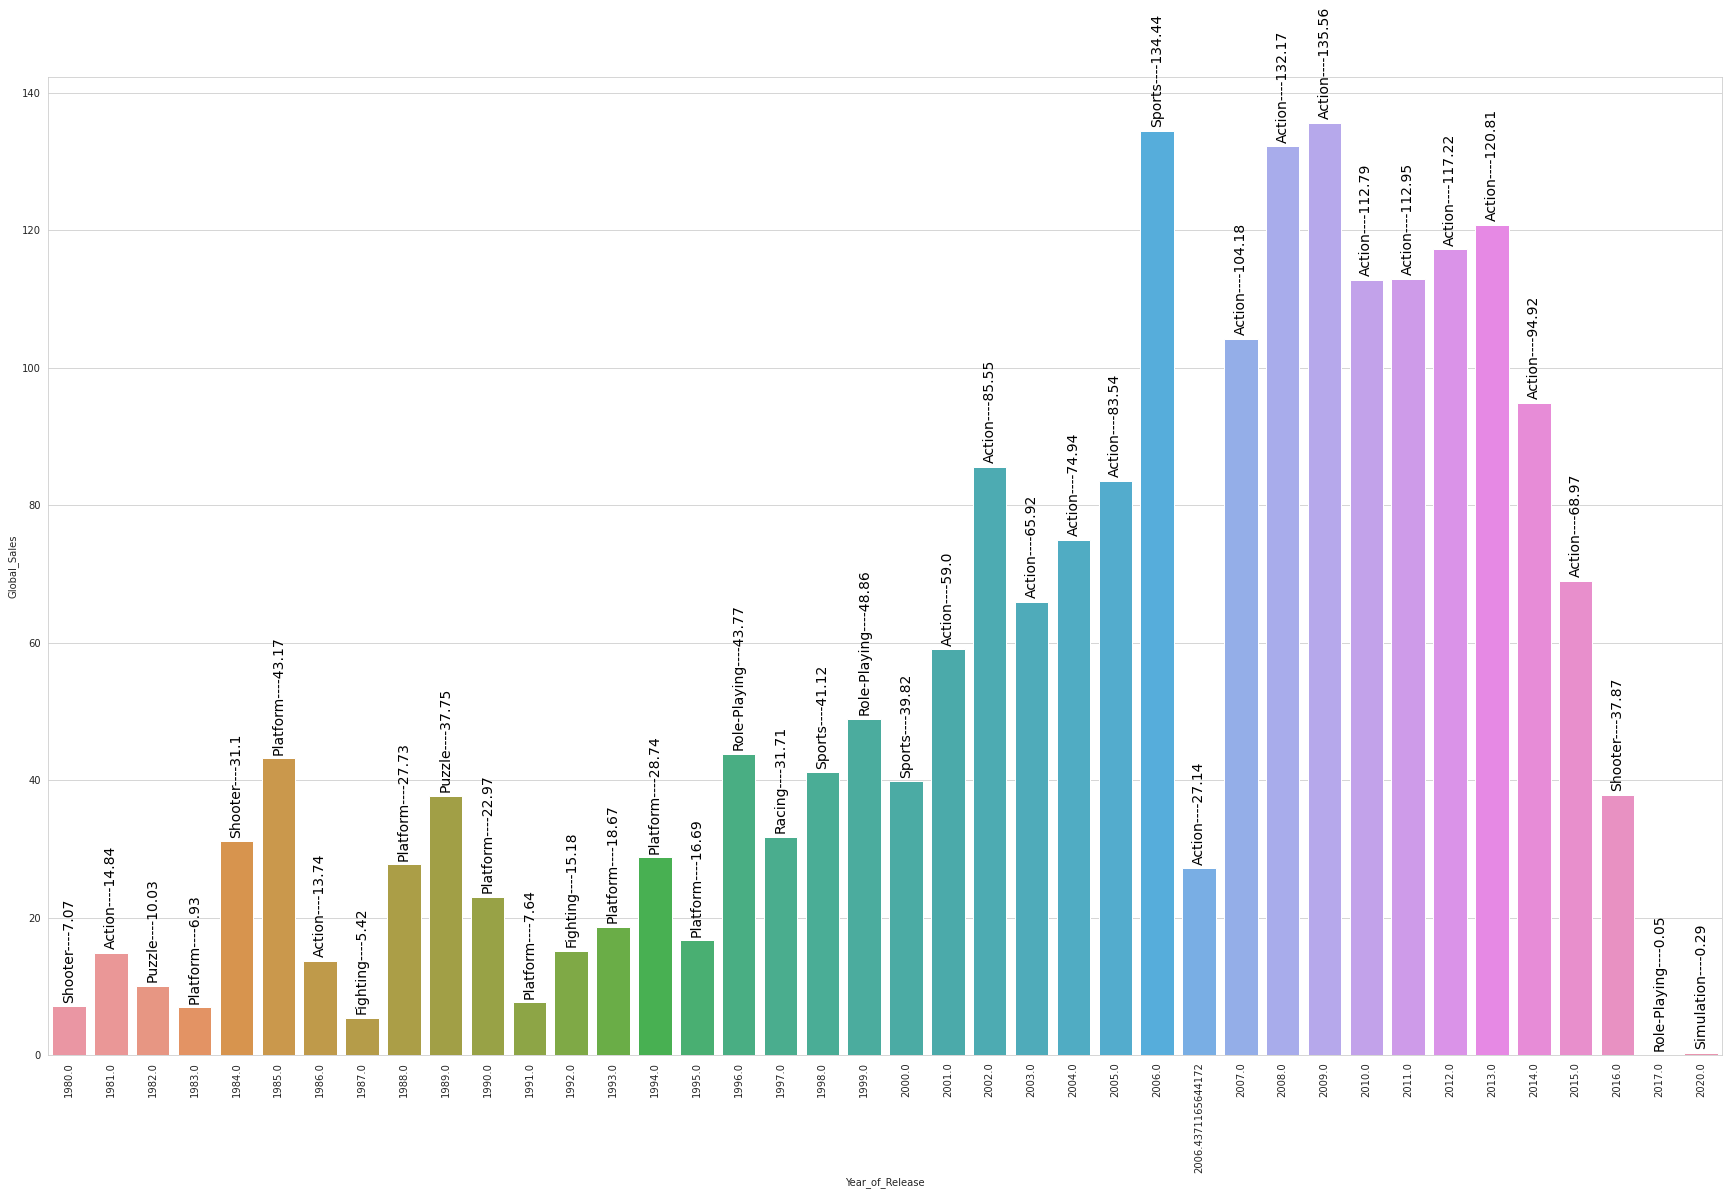

In [35]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year_of_Release', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

**Answer is =>**

2009 Action ---> 135.56 million and 

2006 Sports ---> 134.44 miliion .

##7. Which genre game have the highest sale price globally

In [36]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
data_genre

,Genre,Global_Sales
0,Action,1710.46
10,Sports,1307.09
8,Shooter,1039.50
7,Role-Playing,916.72
4,Platform,818.60
3,Misc,781.53
6,Racing,713.68
2,Fighting,436.89
9,Simulation,380.10
5,Puzzle,234.94


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

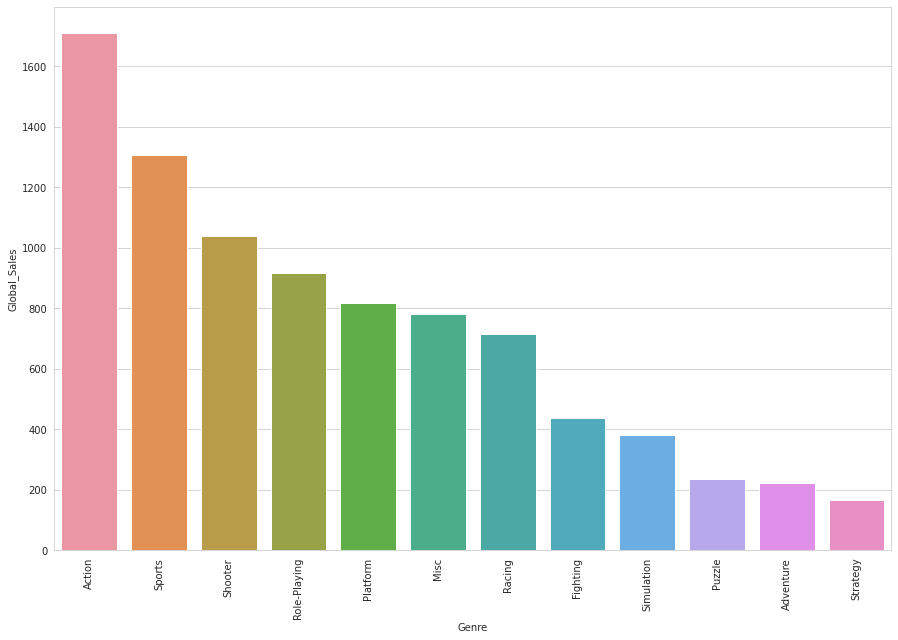

In [37]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

**Action and Sports are always in top. but in third whis is remarkable "Shooter", in count which was no 5.**

##8. Which platfrom have the highest sale price globally

In [38]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
data_platform

,Platform,Global_Sales
16,PS2,1235.55
28,X360,959.63
17,PS3,927.98
26,Wii,891.72
4,DS,775.14
15,PS,718.04
18,PS4,310.70
6,GBA,309.27
19,PSP,280.30
5,GB,254.93


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

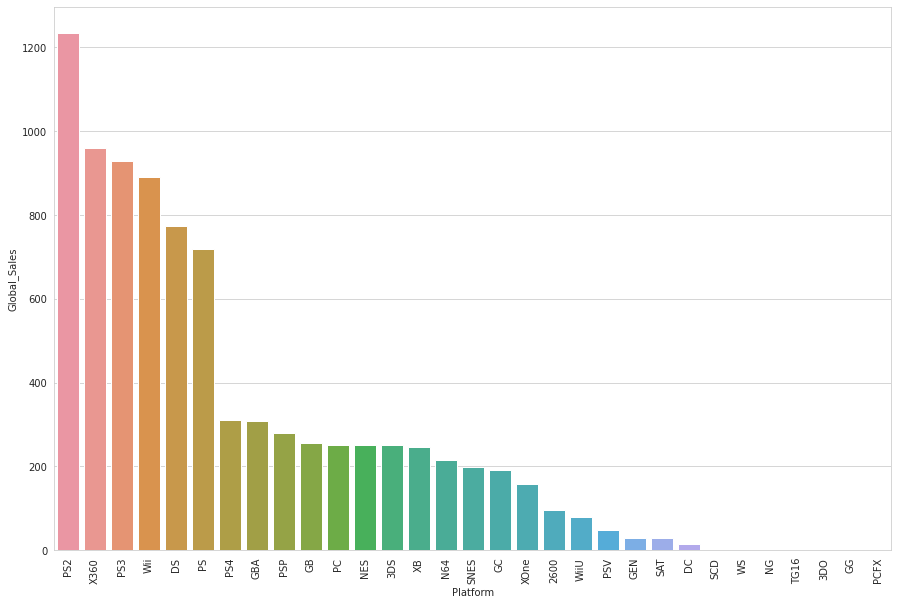

In [39]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

**The winner is PS2**

##9. Which individual game have the highest sale price globally?

In [40]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year_of_Release', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
top_game_sale

,Name,Year_of_Release,Genre,Global_Sales
0,Wii Sports,2006.0,Sports,82.53
1,Super Mario Bros.,1985.0,Platform,40.24
2,Mario Kart Wii,2008.0,Racing,35.52
3,Wii Sports Resort,2009.0,Sports,32.77
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37
5,Tetris,1989.0,Puzzle,30.26
6,New Super Mario Bros.,2006.0,Platform,29.80
7,Wii Play,2006.0,Misc,28.92
8,New Super Mario Bros. Wii,2009.0,Platform,28.32
9,Duck Hunt,1984.0,Shooter,28.31


In [41]:
name = top_game_sale['Name']
year = top_game_sale['Year_of_Release']
y = np.arange(0, 20)

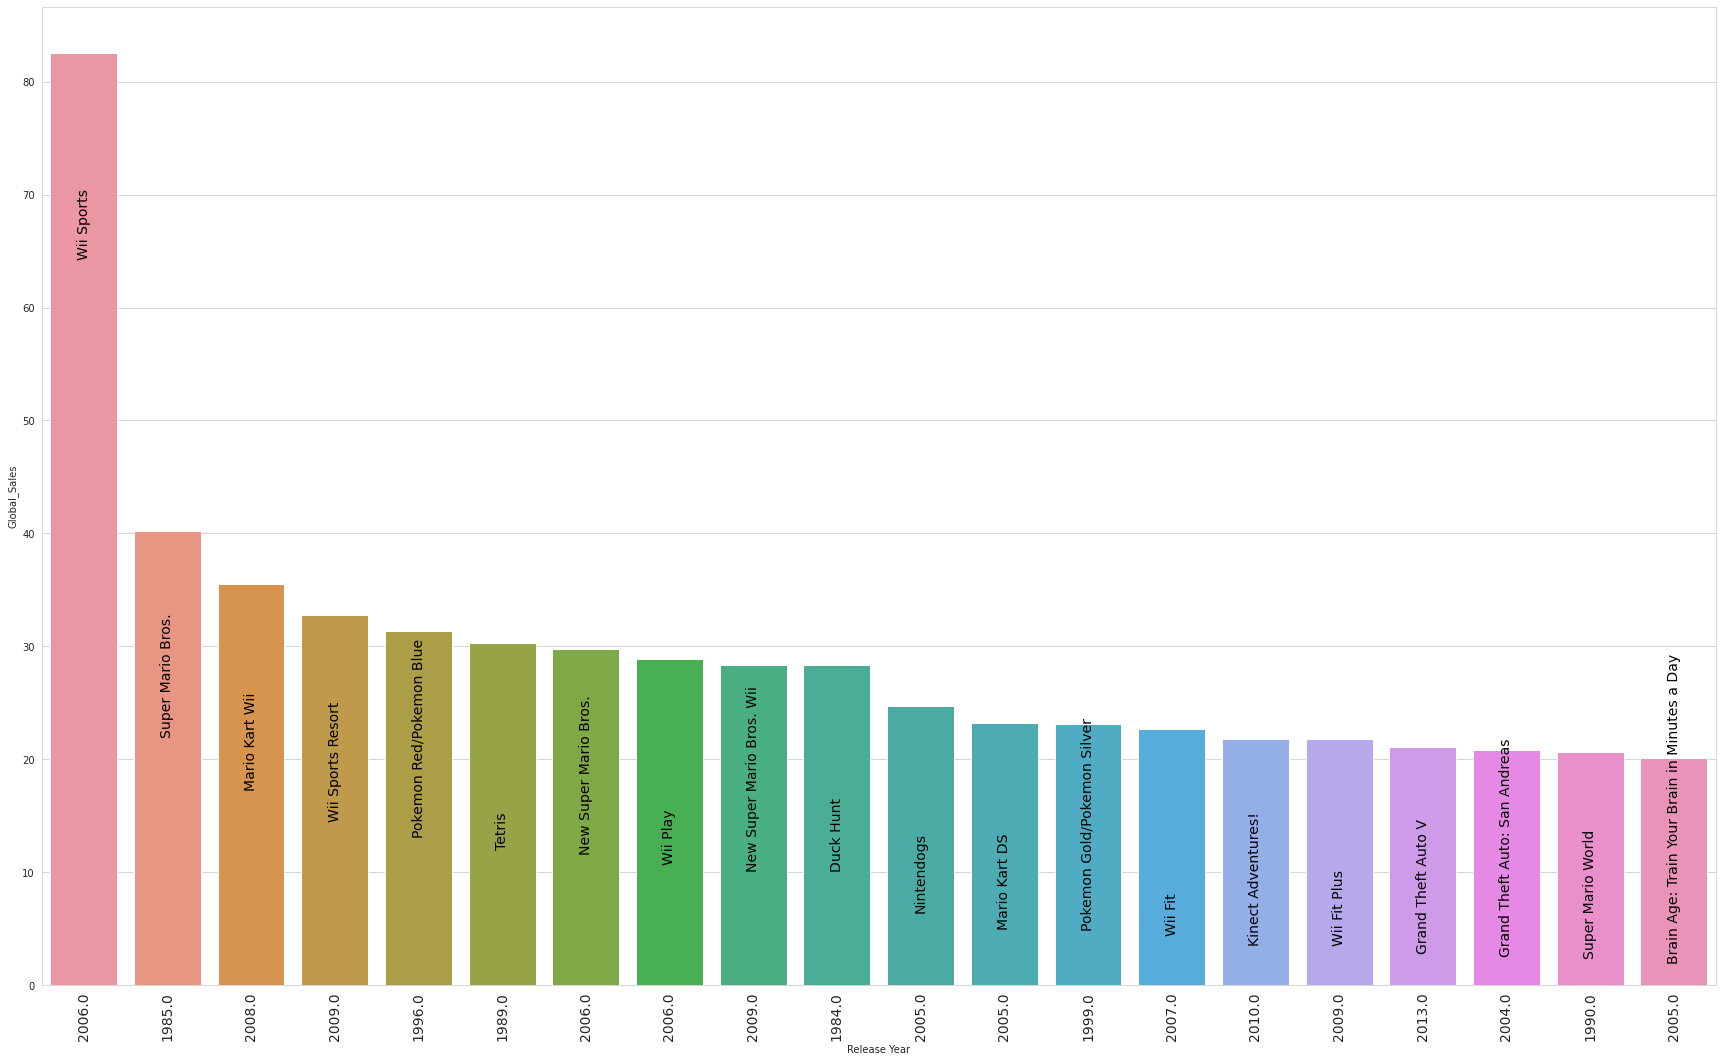

In [42]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year_of_Release'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

**And The winner is Wii Sports**

##10. Sales compearison by genre

In [43]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales']]
comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_map

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,862.37,512.18,152.52
Adventure,99.82,60.78,46.61
Fighting,219.04,98.82,83.19
Misc,395.51,209.76,102.39
Platform,439.61,198.26,129.93
Puzzle,117.05,49.17,56.39
Racing,350.18,232.46,55.86
Role-Playing,326.01,186.12,346.03
Shooter,584.36,314.38,37.14


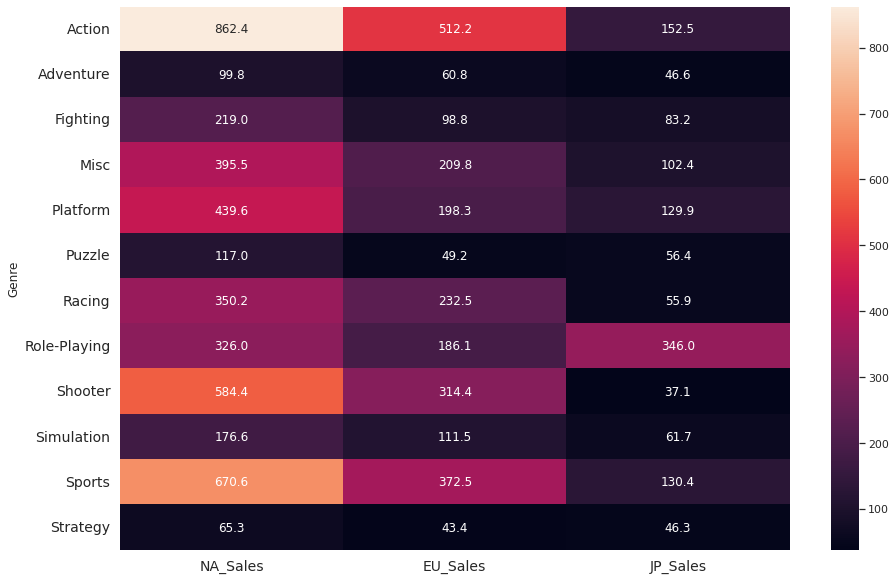

In [44]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [45]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,862.37
1,Adventure,NA_Sales,99.82
2,Fighting,NA_Sales,219.04
3,Misc,NA_Sales,395.51
4,Platform,NA_Sales,439.61


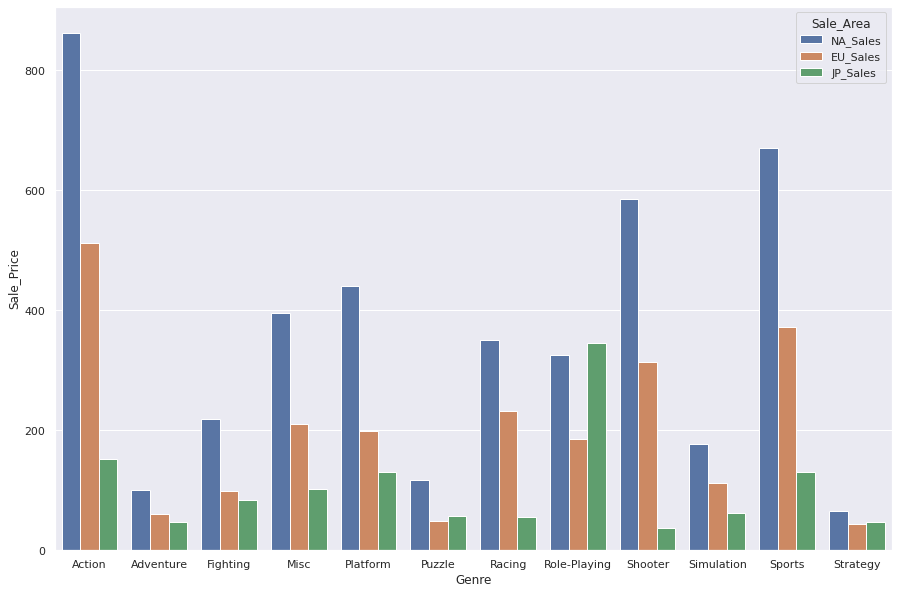

In [46]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

**Here Action Sports and Shooter have much sales compare with others. and North America (NA_sales) have heights sales all the time. Its look like they love video games most.**

##11. Sales compearison by platform

In [47]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales
0,Wii,41.36,28.96,3.77
1,NES,29.08,3.58,6.81
2,Wii,15.68,12.76,3.79
3,Wii,15.61,10.93,3.28
4,GB,11.27,8.89,10.22


In [48]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [49]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.34
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,81.36
3,DC,NA_Sales,5.43
4,DS,NA_Sales,362.40


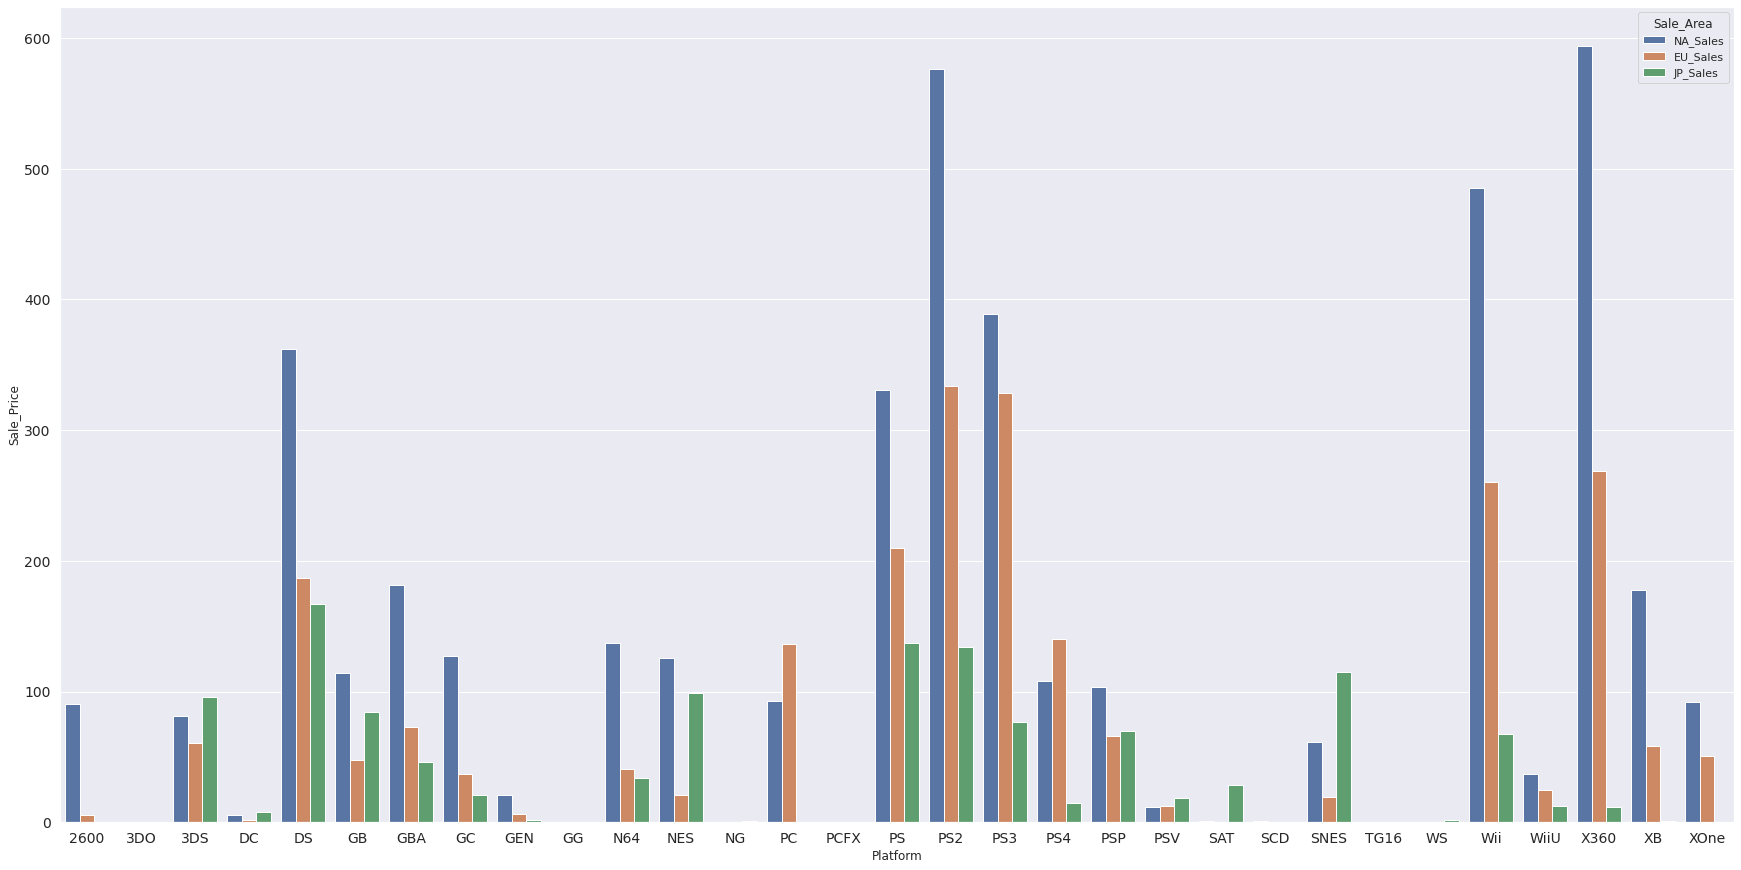

In [50]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**It's clearly shown that X360, PS, and Wii are market leader. and north america always top.**

##12. Top 20 Publisher

In [51]:
top_publisher = data.groupby(by=['Publisher'])['Year_of_Release'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
top_publisher

,Publisher,Year_of_Release
0,Electronic Arts,1267
1,Activision,881
2,Ubisoft,803
3,Namco Bandai Games,778
4,Konami Digital Entertainment,709
5,Nintendo,673
6,THQ,638
7,Sony Computer Entertainment,628
8,Sega,542
9,Take-Two Interactive,377


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

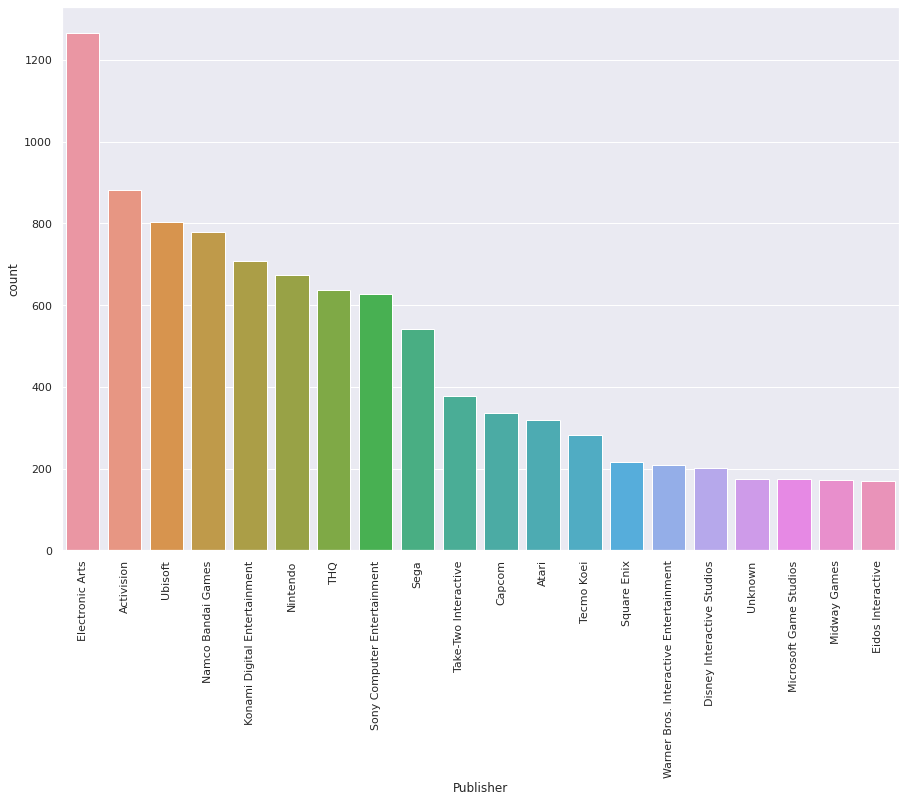

In [52]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year_of_Release'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

**Electronic Arts 1267, its huge
Thank you EA Sports for giving us too many games.**

##13. Top global sales by publisher

In [53]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
sale_pbl

,Publisher,Global_Sales
0,Nintendo,1786.11
1,Electronic Arts,1108.62
2,Activision,721.13
3,Sony Computer Entertainment,600.92
4,Ubisoft,459.73
5,Take-Two Interactive,399.61
6,THQ,331.20
7,Konami Digital Entertainment,271.48
8,Sega,261.36
9,Microsoft Game Studios,246.93


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

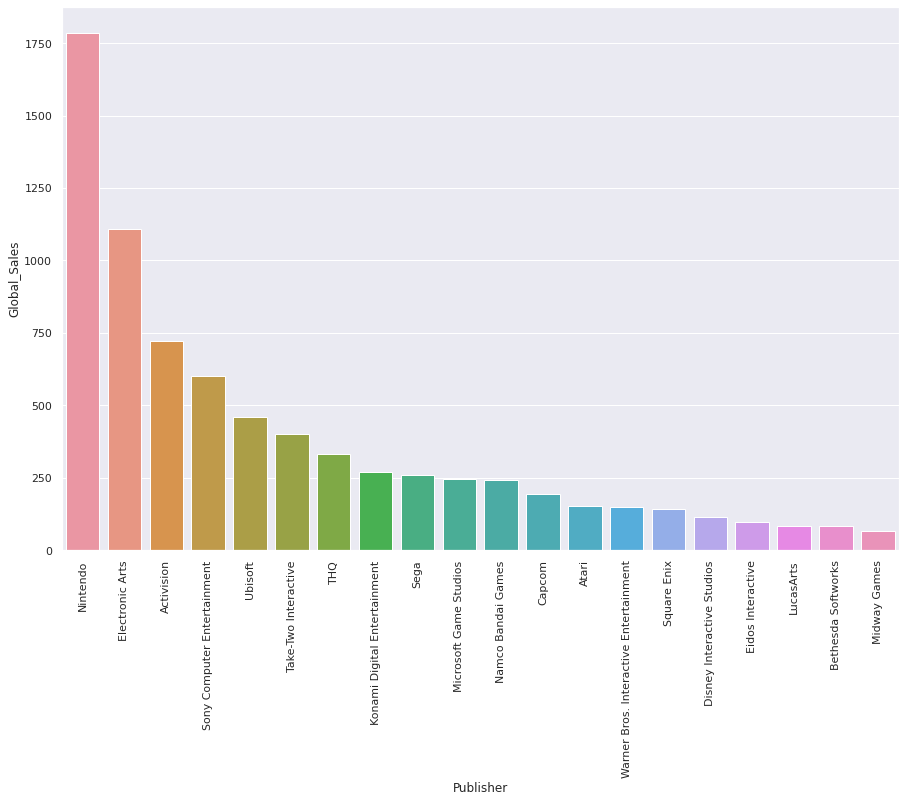

In [54]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

**Wow its awesome Nintendo earns more rather than others. where respectively they are not releases much games.**

##14. publisher comperison

In [55]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,41.36,28.96,3.77,82.53
1,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,15.68,12.76,3.79,35.52
3,Nintendo,15.61,10.93,3.28,32.77
4,Nintendo,11.27,8.89,10.22,31.37


In [56]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)
comp_publisher

,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
343,Nintendo,816.62,418.75,456.10,1786.11
133,Electronic Arts,594.47,371.43,14.18,1108.62
20,Activision,425.16,214.12,6.71,721.13
435,Sony Computer Entertainment,264.25,185.11,72.49,600.92
502,Ubisoft,244.74,159.38,7.21,459.73
472,Take-Two Interactive,219.89,118.47,5.93,399.61
466,THQ,202.49,92.17,5.01,331.20
263,Konami Digital Entertainment,87.83,67.60,86.44,271.48
426,Sega,106.15,79.67,51.89,261.36
310,Microsoft Game Studios,156.69,68.08,3.30,246.93


In [57]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,816.62
1,Electronic Arts,NA_Sales,594.47
2,Activision,NA_Sales,425.16
3,Sony Computer Entertainment,NA_Sales,264.25
4,Ubisoft,NA_Sales,244.74
5,Take-Two Interactive,NA_Sales,219.89
6,THQ,NA_Sales,202.49
7,Konami Digital Entertainment,NA_Sales,87.83
8,Sega,NA_Sales,106.15
9,Microsoft Game Studios,NA_Sales,156.69


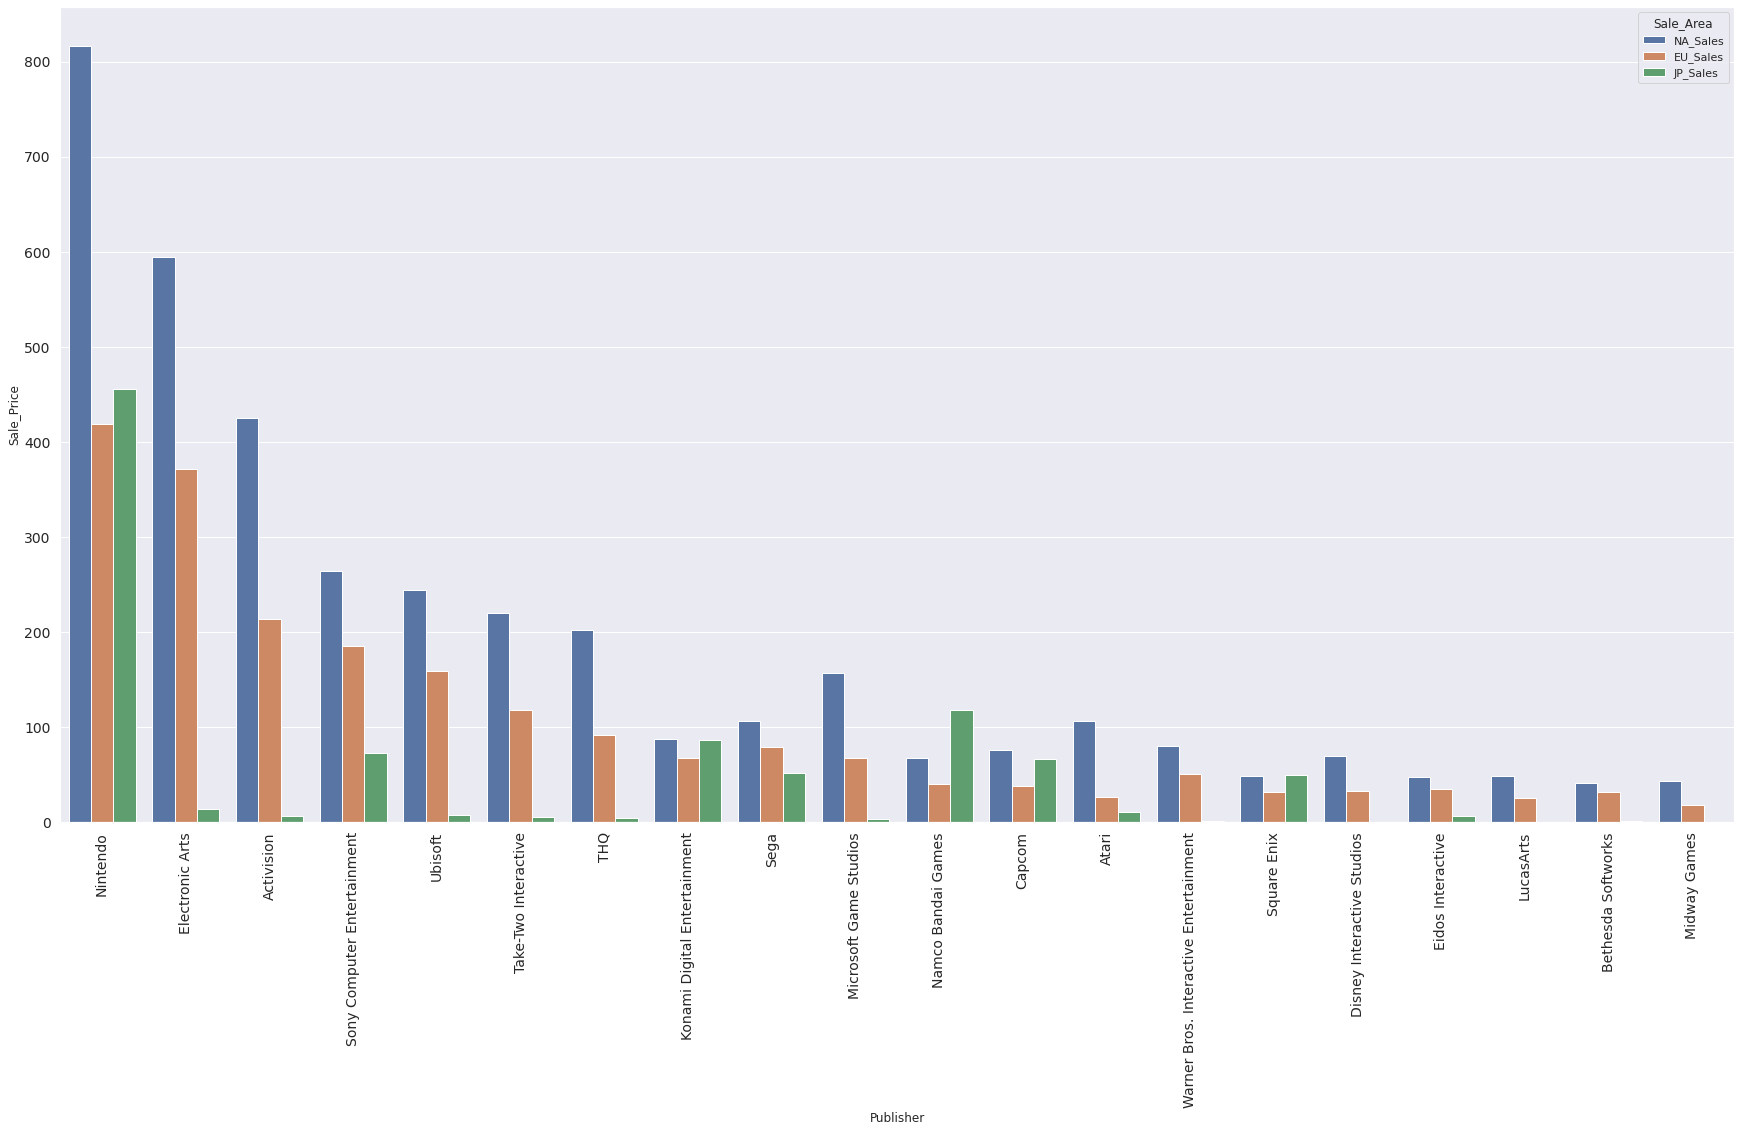

In [58]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

## 15. Top publisher by Count each year

In [59]:
top_publisher =  data[['Year_of_Release', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year_of_Release', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year_of_Release'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year_of_Release", "Count"], keep='last').reset_index(drop=True)
top_publisher_count

,Year_of_Release,Publisher,Count
0,1980.000000,Activision,5
1,1981.000000,Atari,10
2,1982.000000,Atari,14
3,1983.000000,Nintendo,6
4,1984.000000,Nintendo,9
5,1985.000000,Nintendo,7
6,1986.000000,Nintendo,6
7,1987.000000,Nintendo,4
8,1988.000000,Nintendo,6
9,1989.000000,Nintendo,9


In [60]:
publisher= top_publisher_count['Publisher']

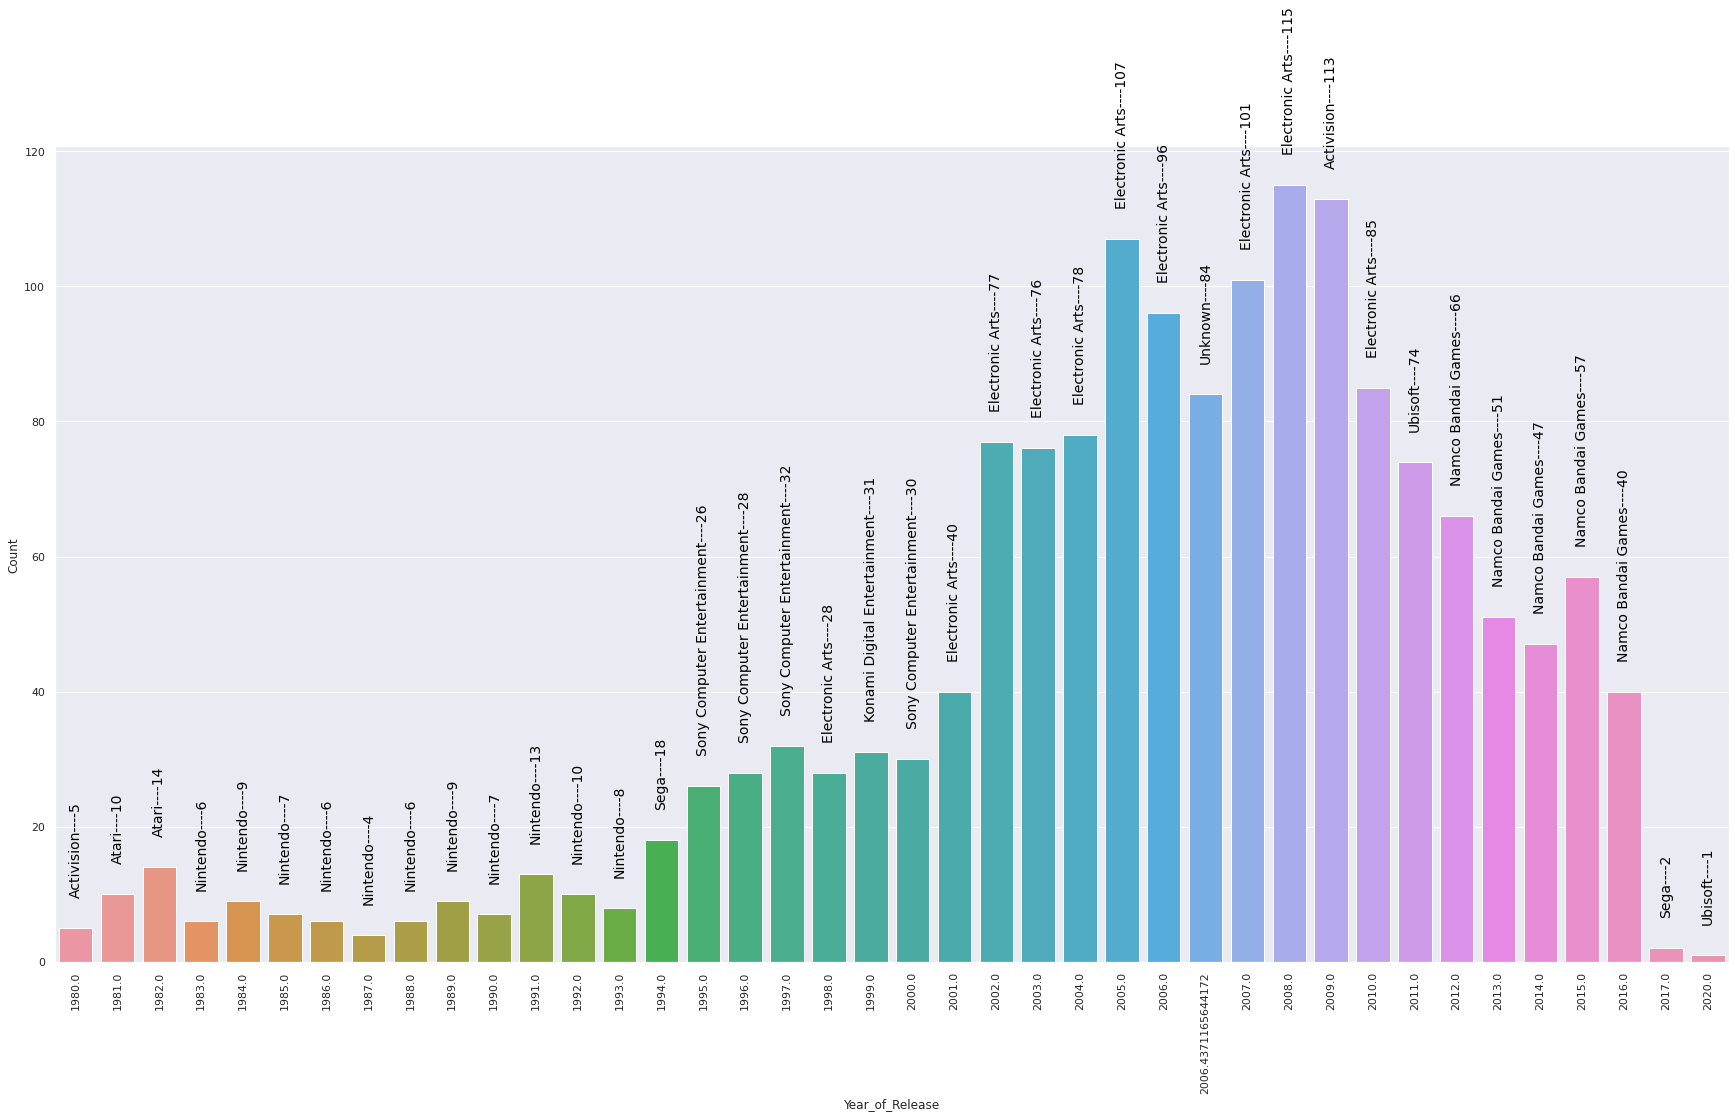

In [61]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year_of_Release', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

##16. Total revenue by region

In [62]:
data.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,35.52


In [63]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales']]

top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4308.33
1,EU_Sales,2389.84
2,JP_Sales,1248.56


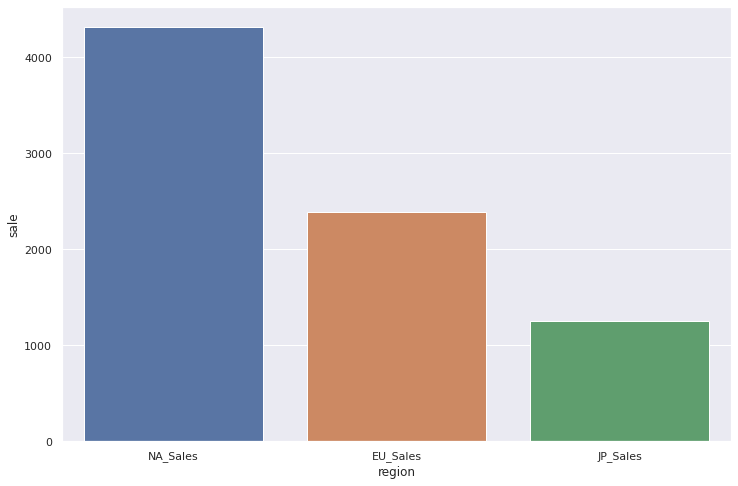

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

**NA_Sales we can see its on the top so we assume that north america people play more video games.**


In [65]:
##pie chart of region sale
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x7f99f2e551d0>,
 [Text(-1.090369467322635, -0.14523919832659965, 'NA_Sales'),
  Text(1.0290314093055064, -0.3887085780668128, 'EU_Sales'),
  Text(0.5211740569267068, 0.9686989224658805, 'JP_Sales')],
 [Text(-0.5947469821759827, -0.07922138090541798, '54.2%'),
  Text(0.5612898596211853, -0.21202286076371604, '30.1%'),
  Text(0.28427675832365823, 0.5283812304359348, '15.7%')])

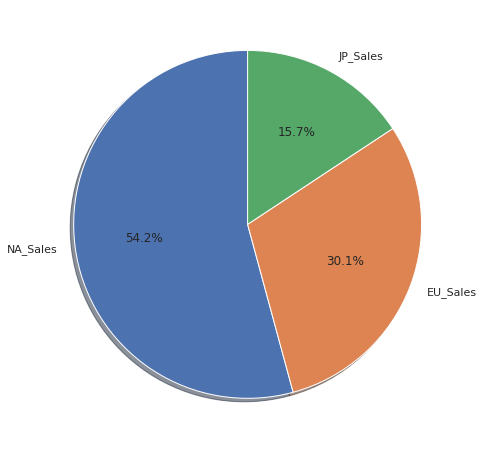

In [66]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

**North America almost Cover 50% of sales.**

##17. Sales Histogram

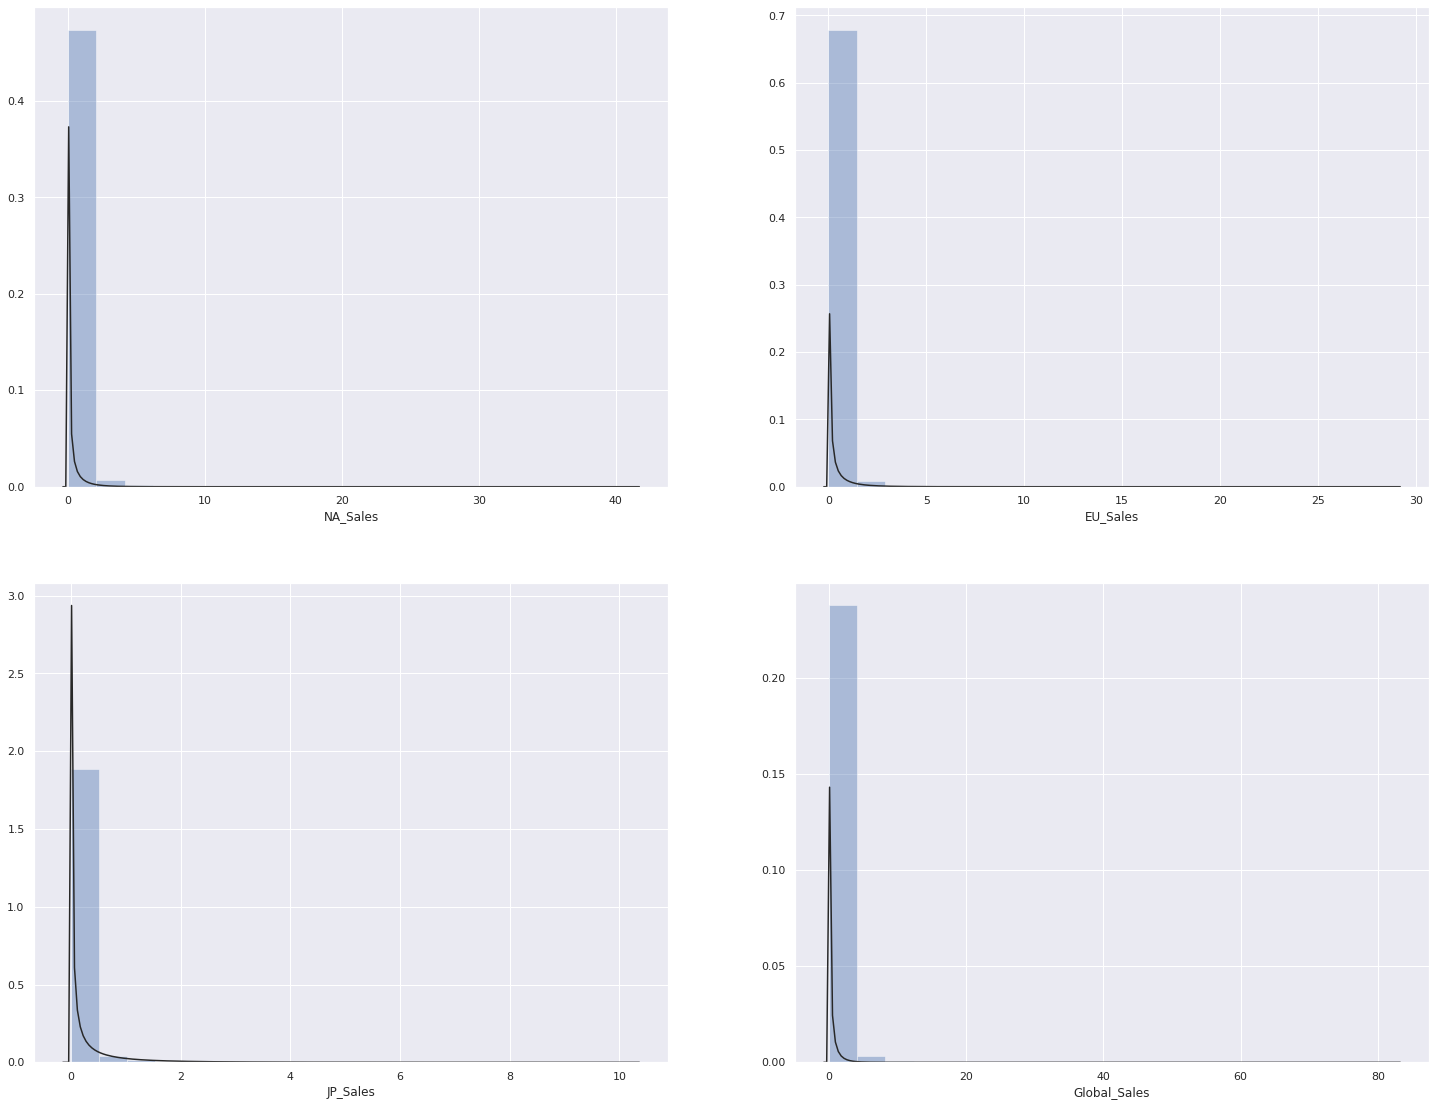

In [67]:
#sns.distplot(data['NA_Sales'],  kde=False, fit=stats.gamma);
#sns.distplot(data['EU_Sales'],  kde=False, fit=stats.gamma);
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)

In [68]:
##Distribution After log transformation
data_hist_log = data.copy()

In [69]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

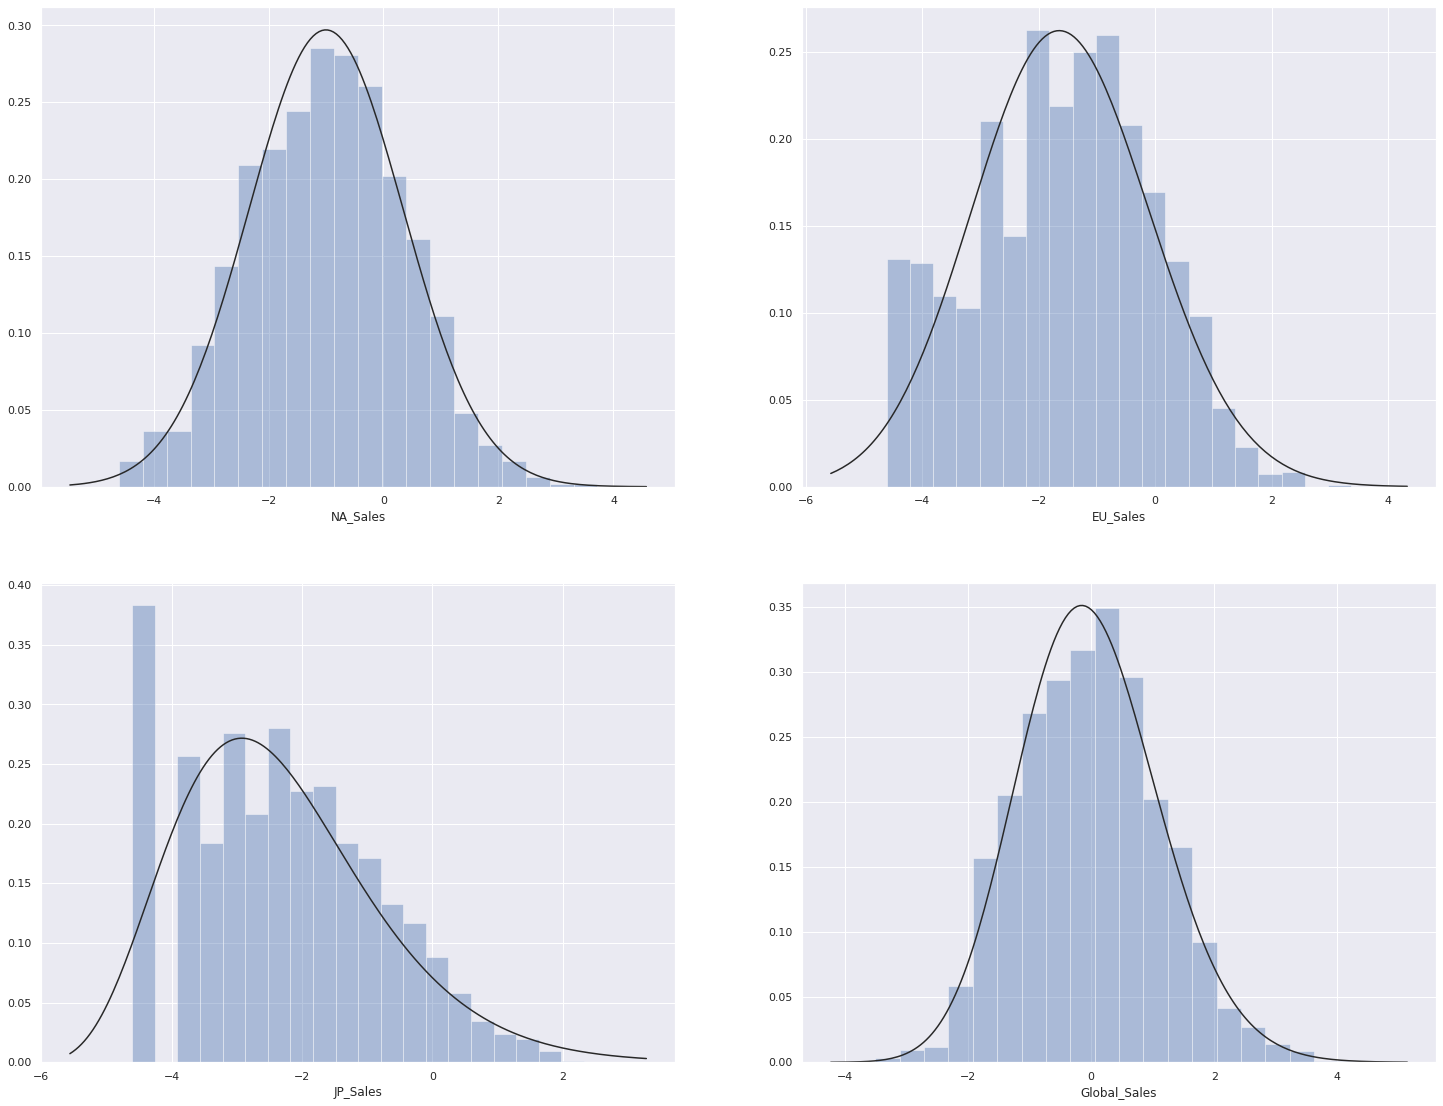

In [70]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

**You can see their skewness and central tendency. we can say that our almost all data are right skewed and symmetric skewed after log transformation**

##18. Relations of columns

**Heatmap**

Heatmap is a good way to understand correlation.

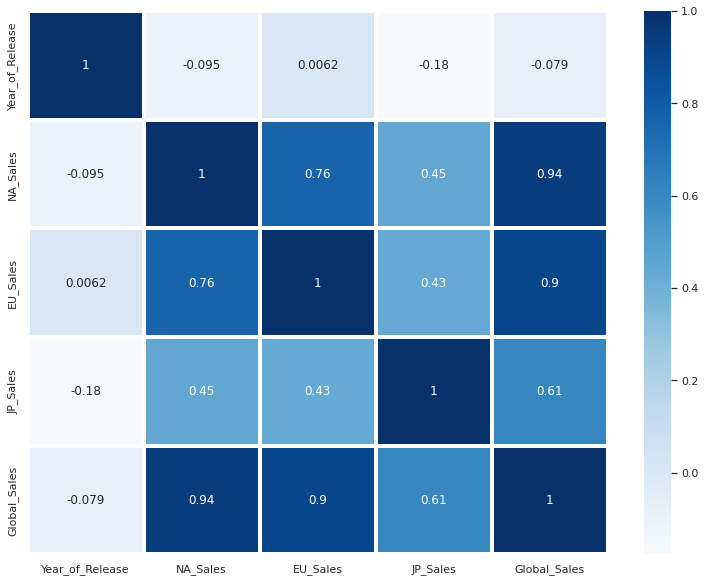

In [71]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)

We can NA_Sales and EU_sales have much effect in Global_Sales. And NA_Sales and EU_sales are mostly corelated

In [72]:
##Pair plot
data_pair = data.loc[:,["Year_of_Release","Platform", "Genre", "NA_Sales","EU_Sales"]]
data_pair


,Year_of_Release,Platform,Genre,NA_Sales,EU_Sales
0,2006.0,Wii,Sports,41.36,28.96
1,1985.0,NES,Platform,29.08,3.58
2,2008.0,Wii,Racing,15.68,12.76
3,2009.0,Wii,Sports,15.61,10.93
4,1996.0,GB,Role-Playing,11.27,8.89
...,...,...,...,...,...
14571,2016.0,PS3,Action,0.00,0.00
14572,2006.0,X360,Sports,0.00,0.01
14573,2016.0,PSV,Adventure,0.00,0.00
14574,2003.0,GBA,Platform,0.01,0.00


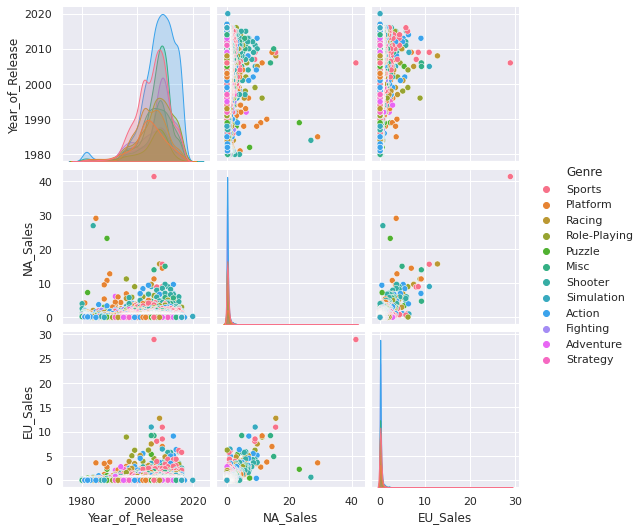

In [73]:
sns.pairplot(data_pair, hue='Genre')

In [74]:
##log work

data_pair_log = data_pair.copy()

In [75]:
sale_columns = ['NA_Sales', 'EU_Sales']

In [76]:
for column in sale_columns:
     if 0 in data[column].unique():
         pass
     else:
         data_pair_log[column] = np.log(data_pair_log[column])
         data_pair_log.head()

In [77]:
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]


In [78]:
data_pair_log

,Year_of_Release,Platform,Genre,NA_Sales,EU_Sales
0,2006.0,Wii,Sports,41.36,28.96
1,1985.0,NES,Platform,29.08,3.58
2,2008.0,Wii,Racing,15.68,12.76
3,2009.0,Wii,Sports,15.61,10.93
4,1996.0,GB,Role-Playing,11.27,8.89
...,...,...,...,...,...
14011,2005.0,PS2,Racing,0.01,0.01
14058,2005.0,DS,Simulation,0.01,0.01
14095,1999.0,PS,Shooter,0.01,0.01
14113,2006.0,PS2,Adventure,0.01,0.01


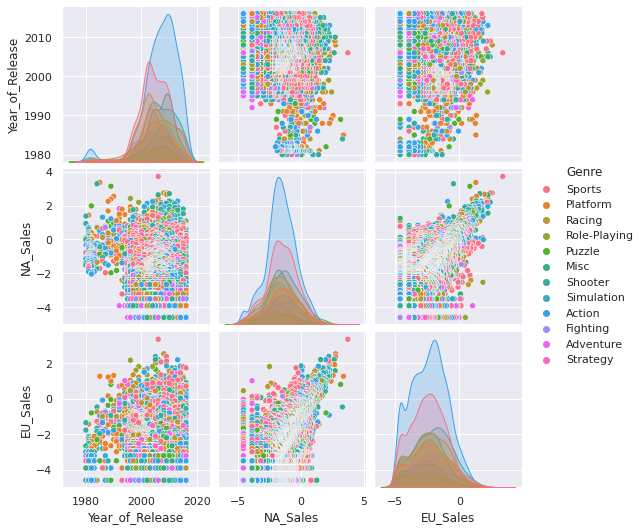

In [79]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);

sns.pairplot(data_pair_log, hue='Genre',  palette="husl")

#Model Building

**Deep Neural Networks for Regression problems**

->*Is an artificial neural network (ANN) with multiple layers between the input and output layers.*

### Load the dataset :
* Load train and test data into pandas DataFrames
* Combine train and test data to process them together

In [80]:
#Importing the dataset
#data = pd.read_csv("Train.csv")

#Importing the dataset
y = pd.read_csv("Test.csv")




In [81]:
data.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,82.53


In [82]:
#Missing values
data.isnull().sum()

Name                2
Platform            0
Year_of_Release     0
Genre               2
Publisher          49
NA_Sales            0
EU_Sales            0
JP_Sales            0
Global_Sales        0
dtype: int64

In [83]:
##Droping the value 

# Name variable because its a unique number
data=data.drop('Name',axis=1)

# Genre variable because its a unique number
data=data.drop('Genre',axis=1)

# Publisher variable because its a unique number
data=data.drop('Publisher',axis=1)

# Platform variable because its a unique number
data=data.drop('Platform',axis=1)

data.head(1)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,2006.0,41.36,28.96,3.77,82.53


In [84]:
#feature scaling
X = data.drop('Global_Sales', axis=1)
y = data['Global_Sales']
X.head(1)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales
0,2006.0,41.36,28.96,3.77


In [85]:
y.head(5)

0    82.53
1    40.24
2    35.52
3    32.77
4    31.37
Name: Global_Sales, dtype: float64

In [86]:
#Data standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [87]:
X.shape

(14576, 4)

In [88]:
y.shape

(14576,)

In [89]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print("x_train shape is:",X_train.shape)
print("y_train shape is:",y_train.shape)
print("x_test shape is:",X_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (11660, 4)
y_train shape is: (11660,)
x_test shape is: (2916, 4)
y_test shape is: (2916,)


## Second : Make the Deep Neural Network
 * Define a sequential model
 * Add some dense layers
 * Use '**relu**' as the activation function in the hidden layers
 * Use a '**normal**' initializer as the kernal_intializer 
           Initializers define the way to set the initial random weights of Keras layers.
 * We will use mean_squared_error as a loss function
 * Define the output layer with only one node
 * Use 'linear 'as the activation function for the output layer
 


In [90]:
model = Sequential()

**The Input Layer**

In [91]:
model.add(Dense(128, kernel_initializer='normal',input_dim =X_train.shape[1], activation='relu'))

**The Hidden Layers**

In [92]:
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

**The Output Layer**

In [93]:
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

**Compile the network**

In [94]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 165,505
Trainable params: 165,505
Non-trainable params: 0
_________________________________________________________________


In [96]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [97]:
#Model fitting in x train, y train , validation data.

model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=35,epochs=50,callbacks=callbacks_list)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
326/334 [============================>.] - ETA: 0s - loss: 0.2261 - mean_squared_error: 0.2261WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f99f342ed40> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSI

In [99]:
# Load wights file of the best model :
wights_file = 'Weights-050--0.00996.hdf5' # choose the best checkpoint 
model.load_weights(wights_file) # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

**We see that the validation loss of the best model is 0.00996**

## Making predictions on Test data

In [103]:
y.head(2)

0    82.53
1    40.24
Name: Global_Sales, dtype: float64

In [105]:
test = pd.read_csv("Test.csv")
test.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.0,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E


In [106]:
#Missing values
test.isnull().sum()

Name                  0
Platform              0
Year_of_Release      37
Genre                 0
Publisher             5
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       1223
Critic_Count       1223
User_Score          888
User_Count         1349
Developer           876
Rating              897
dtype: int64

In [107]:
#Using Mean to fill empty spaces
test['Year_of_Release'] = test['Year_of_Release'].fillna(test['Year_of_Release'].mean())

In [108]:
##Droping the value 

# Critic_Score variable because its a unique number
test=test.drop('Critic_Score',axis=1)


# Critic_Count variable because its a unique number
test=test.drop('Critic_Count',axis=1)


# User_Score variable because its a unique number
test=test.drop('User_Score',axis=1)


# User_Count variable because its a unique number
test=test.drop('User_Count',axis=1)


# Developer variable because its a unique number
test=test.drop('Developer',axis=1)


# Rating variable because its a unique number
test=test.drop('Rating',axis=1)
 

# Name variable because its a unique number
test=test.drop('Name',axis=1)

# Genre variable because its a unique number
test=test.drop('Genre',axis=1)

# Publisher variable because its a unique number
test=test.drop('Publisher',axis=1)

# Platform variable because its a unique number
test=test.drop('Platform',axis=1)


test.head(1)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales
0,2011.0,0.12,0.0,0.0


In [109]:
#Data standardization of test 
scaler = StandardScaler()
test = scaler.fit_transform(test)

In [111]:
#Predicting the test data 
predictions = model.predict(test)

In [112]:
#Predictions
predictions

array([[2.0566177 ],
       [1.9908221 ],
       [2.0669193 ],
       ...,
       [0.38443232],
       [0.2104105 ],
       [0.05916736]], dtype=float32)

### Saving the New Prediction Files to your Local Drive.

In [125]:
test_df = pd.read_csv('Test.csv')

In [ ]:
test_df.head(4)

In [131]:
test_df['Global sales'] = predictions
test_df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global sales
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E,2.056618
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.990822
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E,2.066919


In [132]:
sub_df = test_df[['Name','Global sales']]

sub_df.head(2)

,Name,Global sales
0,Nicktoons: MLB,2.056618
1,Shonen Jump's One Piece: Grand Battle,1.990822


In [133]:
#Submission of ANN an saving the file 
sub_df.to_csv('Submission_ANN.csv',index=False)


In [ ]:
sub_df.head(2)

##Try another ML algorithms :
Now, let us try another ML algorithm to compare the results.

We will use random forest regressor and XGBRegressor.

**Split training data to training and validation data**

In [135]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.25, random_state = 14)


**We will try Random forest model first.**

In [136]:
model = RandomForestRegressor()
model.fit(train_X,train_y)

RandomForestRegressor()

**Get the mean squared error on the validation data**

In [137]:
predicted_prices = model.predict(val_X)
MAE = mean_squared_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  0.815214855742487


In [138]:
predicted_prices = model.predict(test)

In [139]:
predicted_prices

array([2.4625, 2.2732, 2.4606, ..., 1.7879, 1.215 , 0.5102])

In [ ]:
test_df_RF = test_df.copy().drop(columns="Global sales")

test_df_RF.head()

In [ ]:
test_df_RF["Global sales"] = predicted_prices

test_df_RF

In [155]:
test_df_RF = test_df_RF[["Name","Global sales"]]

test_df_RF.head(2)

,Name,Global sales
0,Nicktoons: MLB,2.4625
1,Shonen Jump's One Piece: Grand Battle,2.2732


In [156]:
#Submission of RF an saving the file 
test_df_RF.to_csv('Submission_RF.csv',index=False)

**Now, let us try XGBoost model**

In [148]:
XGBModel = XGBRegressor()
XGBModel.fit(train_X,train_y , verbose=False)

[16:10:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

**Get the mean Squared error on the validation data**

In [149]:
XGBpredictions = XGBModel.predict(val_X)
MAE = mean_squared_error(val_y , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

XGBoost validation MAE =  0.6885462869050456


In [151]:
predicted_Xgboost = XGBModel.predict(test)

In [152]:
predicted_Xgboost

array([2.3917    , 2.3651357 , 2.3917    , ..., 0.81894827, 1.2326176 ,
       0.47528788], dtype=float32)

In [ ]:
Ani = test_df.copy().drop(columns="Global sales")

Ani.head()

In [162]:
Ani["Global sales"] = predicted_Xgboost

Ani.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global sales
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.0,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E,2.3917


In [164]:
Ani = Ani[["Name","Global sales"]]

Ani.head(2)

,Name,Global sales
0,Nicktoons: MLB,2.391700
1,Shonen Jump's One Piece: Grand Battle,2.365136


In [165]:
#Submission of Xgboost an saving the file 
Ani.to_csv('Submission_Xgboost.csv',index=False)

**Submissions of Files Has Been made.**


 **THE END**